# CreditScoring Model
### Develop a credit scoring model to predict the creditworthiness of individuals based on historical financial data. Utilize classification algorithms and assess the model's accuracy.

**BASED ON BANK CREDIT SCORING IF THE PERSON GET LOAN APPROVAL OR NOT**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-credit-scoring/bank.csv
/kaggle/input/bank-credit-scoring/scoring.jpg


In [2]:
#Importing The Required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/bank-credit-scoring/bank.csv", sep=";").drop_duplicates()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# **PREPROCESSING**

In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

<Axes: xlabel='marital', ylabel='count'>

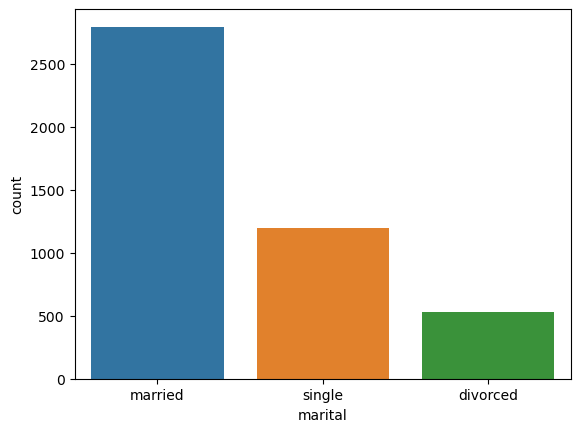

In [6]:
sns.countplot(x='marital',data=df)


<Axes: xlabel='poutcome', ylabel='count'>

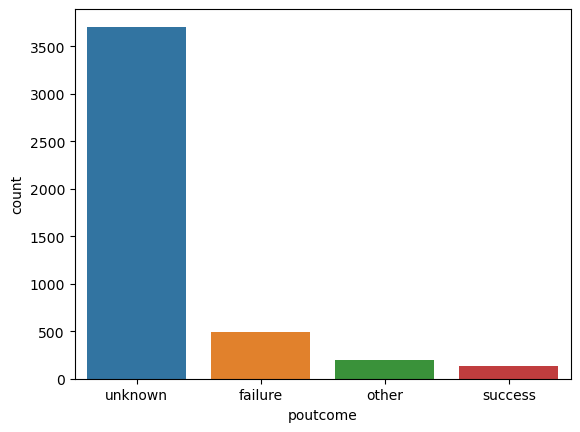

In [7]:
sns.countplot(x='poutcome',data=df)


<Axes: xlabel='housing', ylabel='count'>

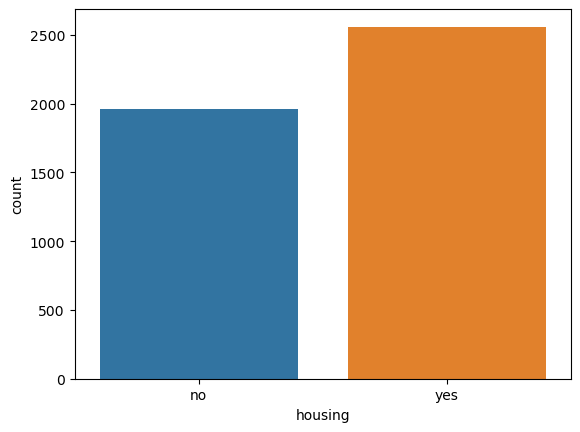

In [8]:
sns.countplot(x='housing',data=df)


### Countplot for categorical features

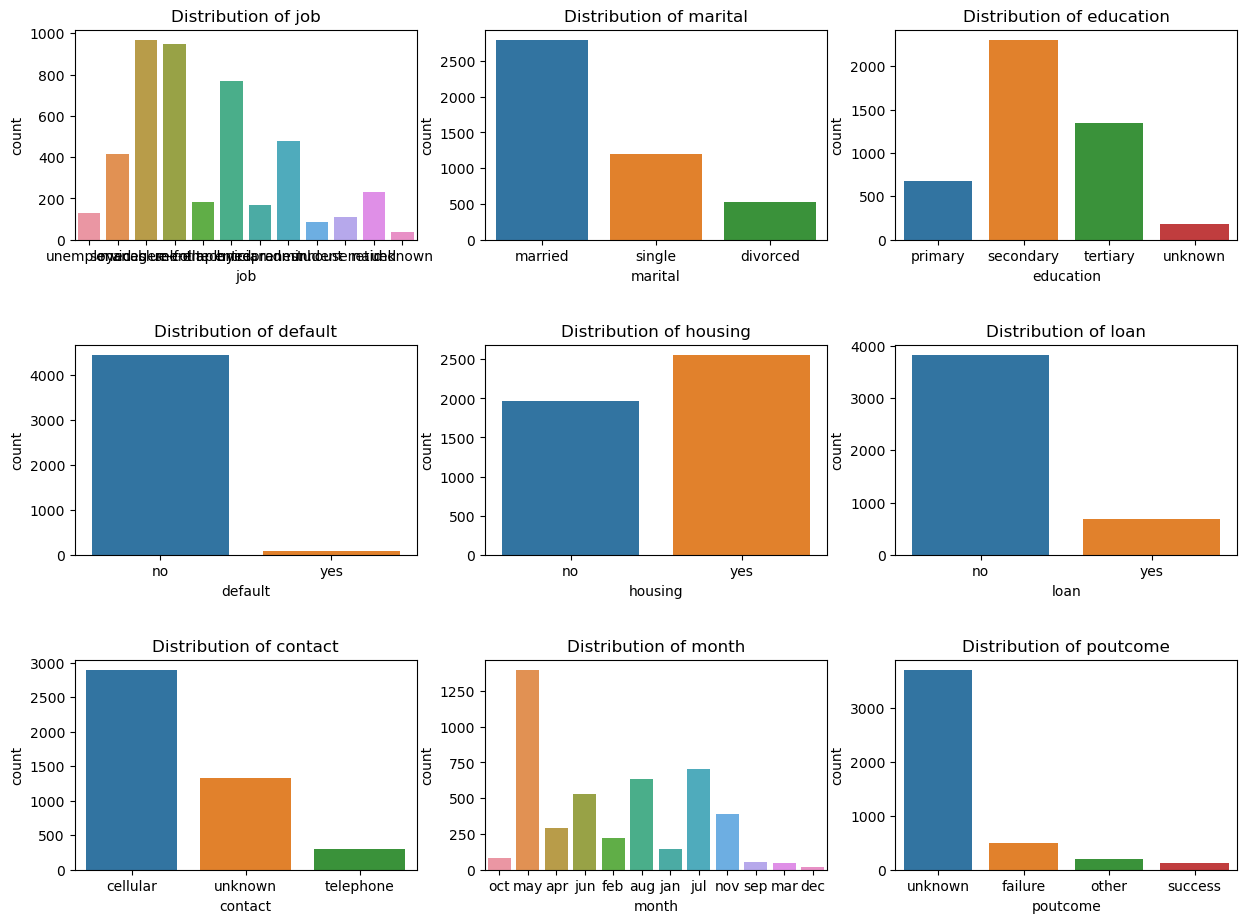

In [9]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_features)//3 + 1, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through categorical features and create countplots
for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Remove empty subplots
for i in range(len(categorical_features), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])

# Show the plot
plt.show()

# Plot histograms for each categorical feature
for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')


plt.show()

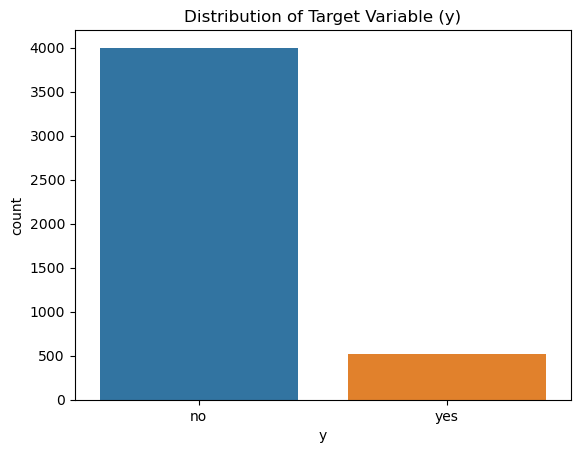

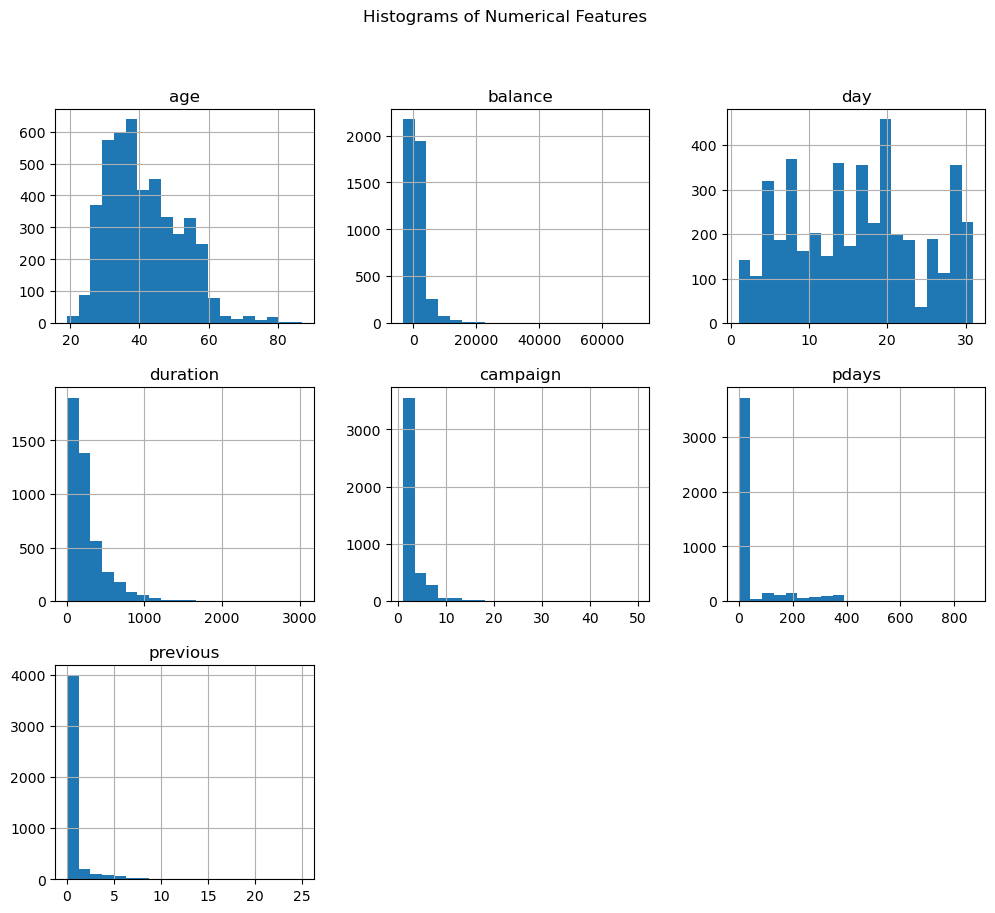

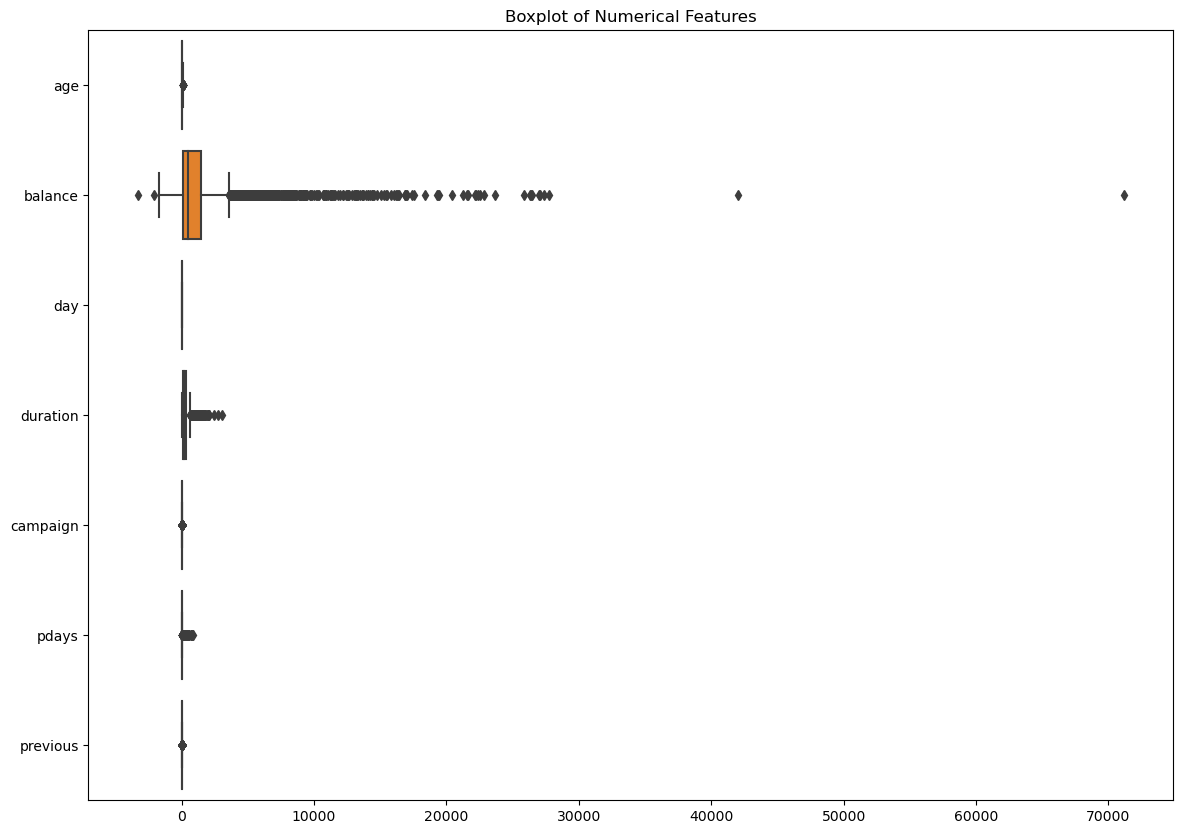

In [10]:
# Distribution of the target variable 'y'
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.show()

# Distribution of numerical features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplot of numerical features
plt.figure(figsize=(14, 10))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Numerical Features')
plt.show()

In [11]:
lst=["job","marital","education","default","housing","housing","loan","contact","month","poutcome","y"]
le=LabelEncoder()
for i in lst:
    df[i]=le.fit_transform(df[i])

In [12]:
df.rename(columns={"y": "loan_approval"}, inplace=True)


In [13]:
x=df.iloc[:,:-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


In [14]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: loan_approval, Length: 4521, dtype: int64

In [15]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x,y=sm.fit_resample(x,y)

In [16]:
#minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(x)
Xsc

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.38990826, 0.16      ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.37958716, 0.04      ,
        0.        ],
       ...,
       [0.13235294, 0.36363636, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.20588235, 0.09090909, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.69117647, 0.45454545, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

In [17]:
#splitting to test and train data
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.1,random_state=4)

# **MODEL IMPLIMENTATION**

In [18]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86       390
           1       0.81      1.00      0.89       410

    accuracy                           0.88       800
   macro avg       0.90      0.88      0.88       800
weighted avg       0.90      0.88      0.88       800



In [19]:
sv=SVC(C=10, gamma =1, kernel= 'rbf')
sv.fit(X_train,y_train)
y_pred2=sv.predict(X_test)
y_pred2

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [20]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       390
           1       0.88      0.92      0.90       410

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [21]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)


In [22]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       390
           1       0.74      0.75      0.74       410

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800



In [23]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)


In [24]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       390
           1       0.85      0.94      0.89       410

    accuracy                           0.88       800
   macro avg       0.89      0.88      0.88       800
weighted avg       0.89      0.88      0.88       800



In [25]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)


In [26]:
print(classification_report(y_test,y_pred4))


              precision    recall  f1-score   support

           0       1.00      0.95      0.98       390
           1       0.96      1.00      0.98       410

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [27]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)


In [28]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       390
           1       0.93      1.00      0.97       410

    accuracy                           0.96       800
   macro avg       0.97      0.96      0.96       800
weighted avg       0.97      0.96      0.96       800



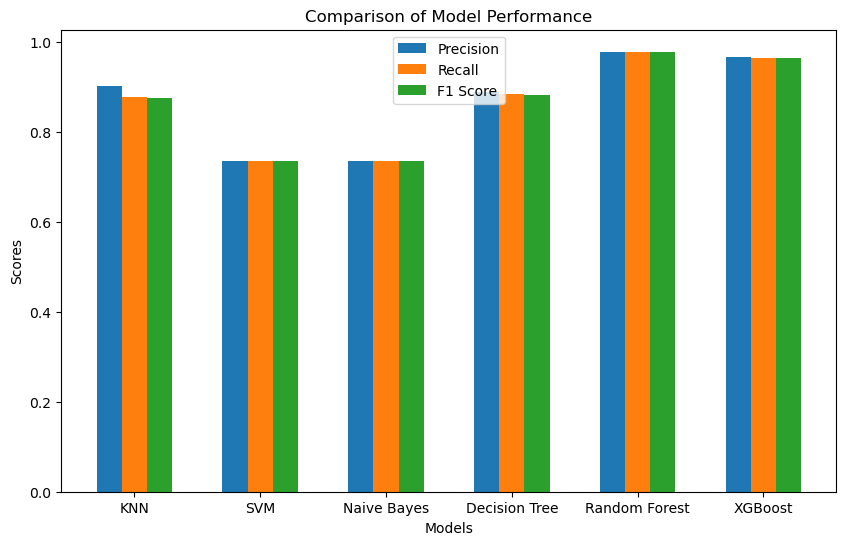

In [29]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their respective predictions
models = ['KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']
predictions = [y_pred1, y_pred2, y_pred2, y_pred3, y_pred4, y_pred7]

# Calculate precision, recall, and f1-score for each model
precision = []
recall = []
f1_score = []

for y_pred in predictions:
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision.append(p)
    recall.append(r)
    f1_score.append(f)

# Plotting the comparison
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(models))

rect1 = ax.bar(index, precision, bar_width, label='Precision')
rect2 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
rect3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.show()


HIGEST VALE IS .98 ACCURACY IN **Random Forest Classifier**

## RNN Approch
### LSTM:
LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN). Both LSTM and traditional RNNs are neural network architectures designed for processing sequences of data. They are particularly well-suited for tasks involving sequential or time-dependent patterns, such as time series analysis, natural language processing, and speech recognition.

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM (assuming you have a time series dataset)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test_lstm, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Epoch 1/50
225/225 [==============================] - 4s 7ms/step - loss: 0.6478 - accuracy: 0.6294 - val_loss: 0.6144 - val_accuracy: 0.6687
Epoch 2/50
225/225 [==============================] - 1s 3ms/step - loss: 0.5635 - accuracy: 0.7128 - val_loss: 0.5439 - val_accuracy: 0.7250
Epoch 3/50
225/225 [==============================] - 1s 3ms/step - loss: 0.5039 - accuracy: 0.7688 - val_loss: 0.4980 - val_accuracy: 0.7812
Epoch 4/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4804 - accuracy: 0.7872 - val_loss: 0.4868 - val_accuracy: 0.7937
Epoch 5/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4734 - accuracy: 0.7890 - val_loss: 0.4800 - val_accuracy: 0.7937
Epoch 6/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4694 - accuracy: 0.7915 - val_loss: 0.4808 - val_accuracy: 0.7875
Epoch 7/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4673 - accuracy: 0.7926 - val_loss: 0.4794 - val_accuracy: 0.7937
Epoch 